<a href="https://colab.research.google.com/github/uday2510/Yes_bank_stock_price_prediction/blob/main/UN_%7C_Yes__bank_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



**Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**  Uday naidu


# **Project Summary -**

1. The yes bank closing price data set consisted of 5 features with one date
   column and rest of the features was numerical.

2. Since the dataset was very perfect as it had no missing and null values we
   did not need to perform data cleaning part.So, I directly jumped into visualization part where i created different different types of chart to visualize my data and gain some insights with respect to independant variable.

3. After that i performed the train test split method to split the data into
   train and test part following the the features scaling technique before fitting the model.
4. The feature scaling technique I used is Standard Scaler.after this i trained
   the model and predicted the values.

5. In this project i used two models one is the Linear Regression and other   
   one is Ride Regression with the Cross Validation techniueq and hyperparamter tuning for both the models to check the performance of both the model with and without hyperparamter tuning.

6. The MSE and R2 score are commonly used evaluation metrics for regression
  models. In this case, the Linear Regression and Ridge Regression models have very similar performance, with the Ridge Regression model having a slightly lower MSE and a slightly higher R2 score. The mean squared error (MSE) measures the average squared difference between the predicted and actual values, where a lower MSE indicates better performance. The R-squared (R2) score measures the proportion of the variance in the dependent variable that is predictable from the independent variables, where a higher R2 score indicates better performance.



# **GitHub Link -**

https://github.com/uday2510/Yes-_bank_closing_price_prediction/blob/main/UN_%7C_Yes__bank_closing_price_prediction.ipynb

# **Problem Statement**



Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **General Guidelines** : -  


1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd                                                                 #Library for pandas
import numpy as np                                                                  #Library for Numpy
from datetime import datetime                                                       #Datetime library
import matplotlib.pyplot as plt                                                     #Library for Visualization from matplotlib
import seaborn as sns                                                               #Library for seaborn visualization
from sklearn.preprocessing import StandardScaler                                    #Library for feature scaling
from sklearn.model_selection import train_test_split                                #Library for splitting the dataset
from sklearn.linear_model import LinearRegression                                   #Library for  ML Model
from sklearn.metrics import mean_absolute_error ,r2_score, mean_squared_error       #Library for  checking accuracy and evaluation
from sklearn.model_selection import GridSearchCV                                    #Library for hyperparamter tuning
from sklearn.linear_model import Ridge

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
path='/content/drive/MyDrive/Yes _bank_closing_price_prediction/data_YesBank_StockPrices.csv'
df = pd.read_csv(path)

### Dataset Rows & Columns count

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

We can say that we do not hve any duplicated values in this data

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().count()

Date     185
Open     185
High     185
Low      185
Close    185
dtype: int64

We can say that we do not hve any missing values in this data

### What did you know about your dataset?

**In this dataset we have 5 features which has no missing values and no duplicated values.**

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

**From these 5 features, 4 of them are numerical features and one is object.**

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  print(i)
  print(df[i].unique())

Date
['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14' 'Jun-14' 'Jul-14' 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

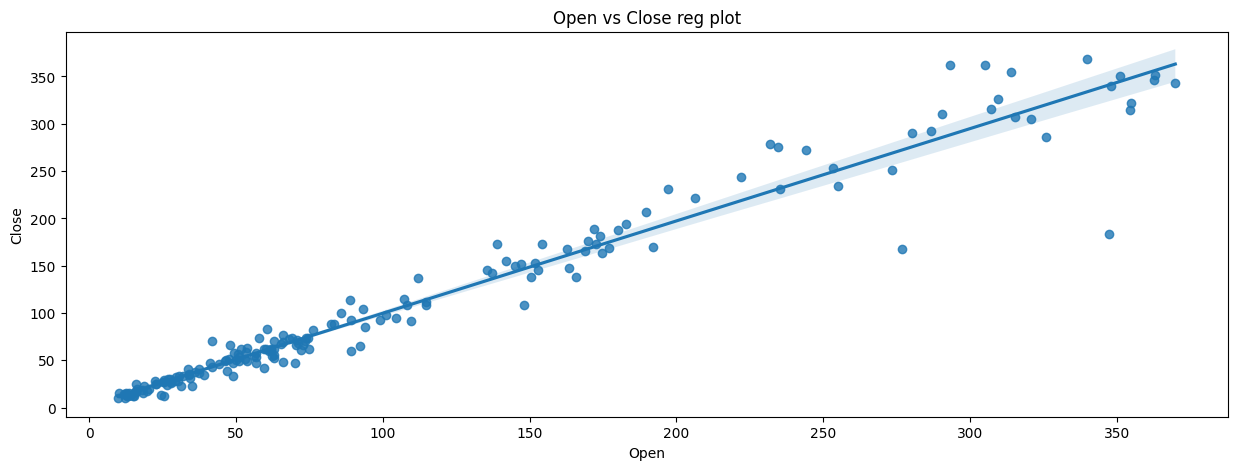

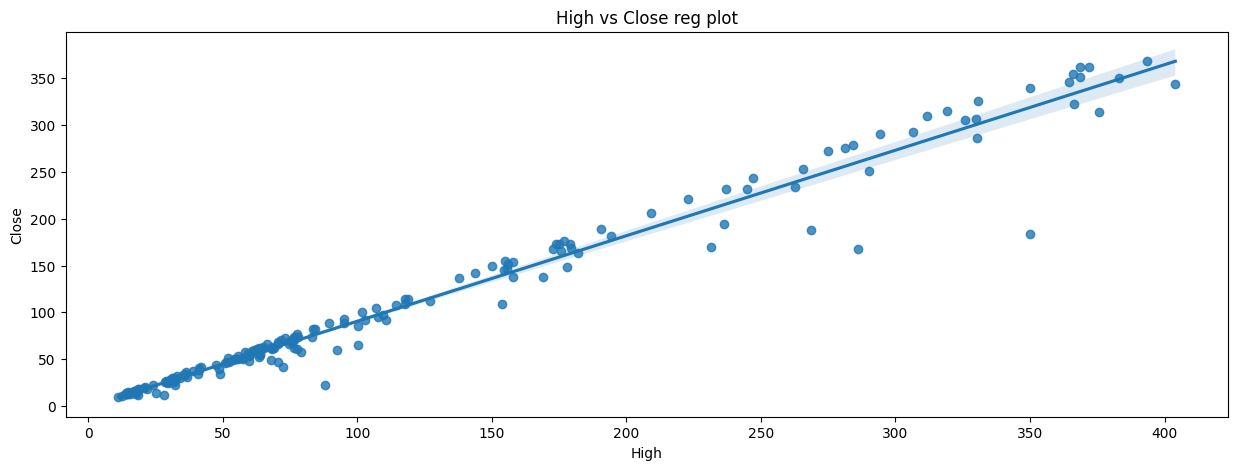

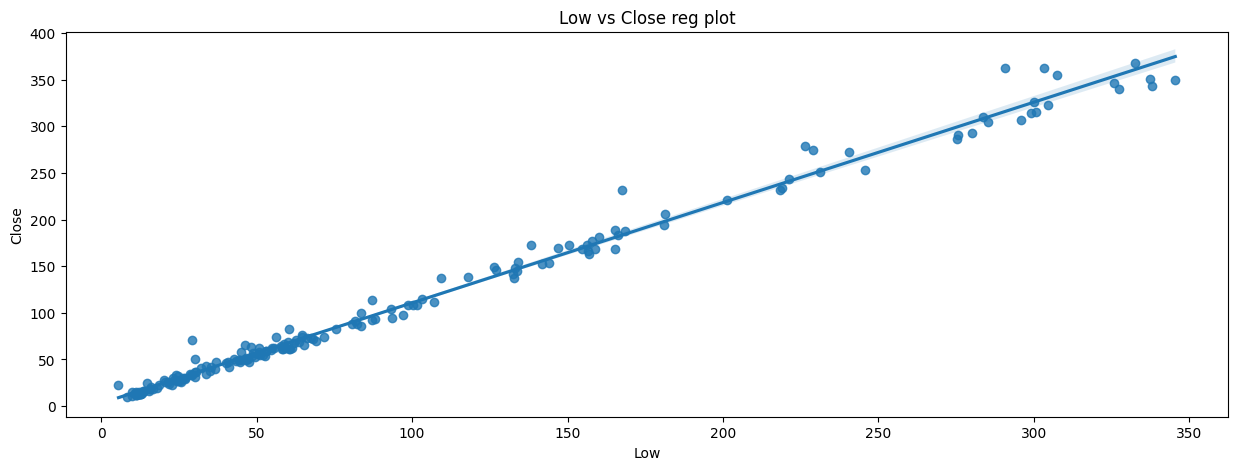

In [ ]:
# Chart - 1 visualization code
for i in df.columns[1:4]:
    plt.figure(figsize=(15,5))
    sns.regplot(data=df,x=i,y='Close')
    plt.xlabel(i)
    plt.ylabel('Close')
    plt.title(f'{i} vs Close reg plot')
    plt.show()

##### 1. Why did you pick the specific chart?

**we have used the regression chart to check the linear relationship between dependant and independent features**

##### 2. What is/are the insight(s) found from the chart?

**By the regression plot we can conclude that the open,high,low features are highly corelated with close feature**

##### 2. What is/are the insight(s) found from the chart?

**The insights we found form this chart is that we can say that the all the features are highly correlated.**

#### Chart - 2

Text(0.5, 1.0, 'Boxplot')

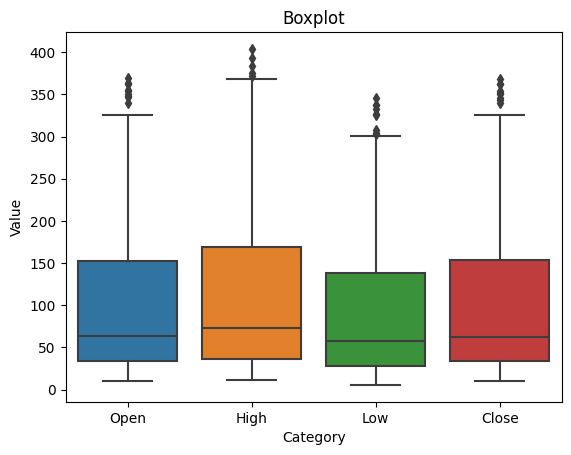

In [ ]:
# Chart - 3 visualization code
sns.boxplot(df)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Boxplot')

##### 1. Why did you pick the specific chart?

We have  used this boxplot chart to detect the outliers in each features

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

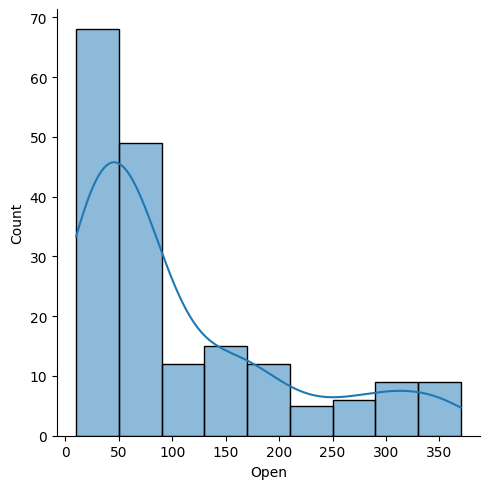

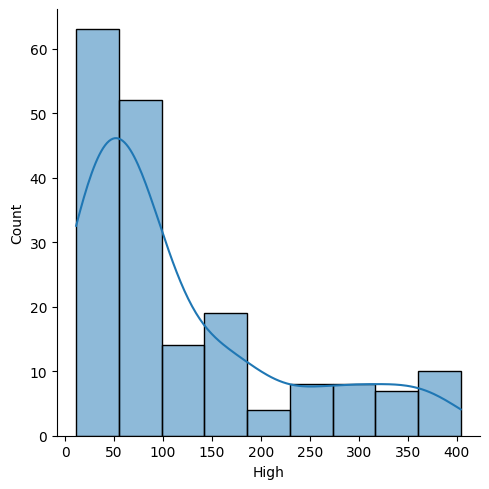

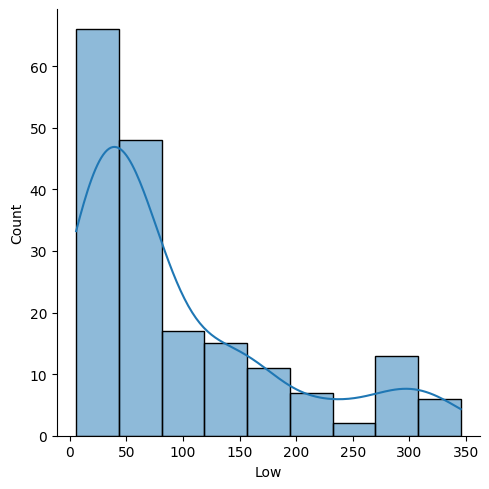

In [ ]:
# Chart - 4 visualization code
for i in df.columns[1:4]:
    sns.displot(df[i], kde=True)
    plt.show()

##### 1. Why did you pick the specific chart?

**We choose distplot to check the distribution of the independant features**

##### 2. What is/are the insight(s) found from the chart?

The insights we found from this visualisation is that the distribution of all the three featues are rightly skewed

#### Chart - 4

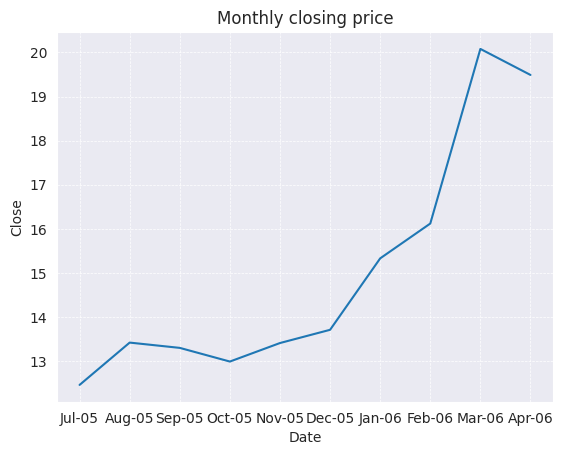

In [ ]:
# Chart - 5 visualization code
sns.set_style('dark')
sns.lineplot(x=df['Date'][:10],y=df['Close'][:10])
plt.title('Monthly closing price')
plt.grid( which='major', axis='both',linestyle='--', linewidth=0.5)

##### 1. Why did you pick the specific chart?

**we used line chart to visualize the closing price trends of every month**

##### 2. What is/are the insight(s) found from the chart?

From the line chart of  closing price we found out that the closing price of the stock from the month july 2005 to jan 2006 was very low and from feb 2006 to april 2066 the closing price of the stock was very high.

#### Chart - 5 - Correlation Heatmap

<ipython-input-17-b6b4509edd5c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu",annot=df.corr(),fmt='.2f',square=True)


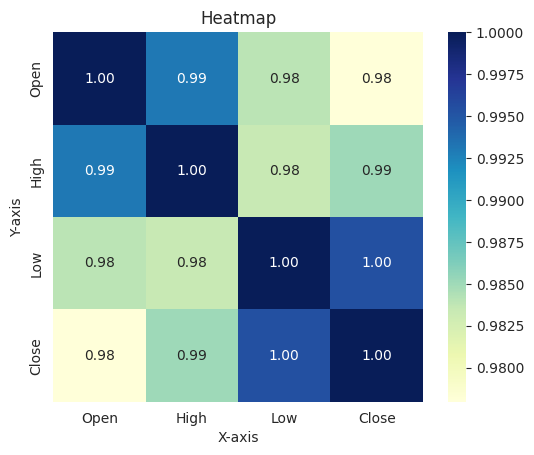

In [ ]:
# Correlation Heatmap visualization code

sns.heatmap(df.corr(), cmap="YlGnBu",annot=df.corr(),fmt='.2f',square=True)
plt.title("Heatmap")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

##### 1. Why did you pick the specific chart?

**Here we used heatmap to check the corelation bewteen the each and every features.**

##### 2. What is/are the insight(s) found from the chart?

**the insights we found form this chart is that we can say that the all the features are highly correlated.**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

**Since there are no missing values found in the given dataset , there is no need for using the impuatation technique.**

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

**As there were large number of outliers in the dataset so we didnot remove the outliers.**

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

**As we have have all the features in numerical category , we dont need to perform categorical encoding.**

### 8. Data Preprocessing

### 1.assigning dependant and independant variable

In [ ]:
X=df.iloc[:, 1:4]
Y=df['Close']

### 2.Data Splitting

In [ ]:
# Split data to train and test.

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=10, test_size=0.25)

##### What data splitting ratio have you used and why?

**We have used 75:25 split ratio with respect to train and test data. **

### 3.Feature Scaling

In [ ]:
SS=StandardScaler()
X_train=pd.DataFrame(SS.fit_transform(X_train),columns=X_train.columns)

In [ ]:
X_test=pd.DataFrame(SS.transform(X_test),columns=X_test.columns)

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***9. ML Model Implementation***

### ML Model - 1
Linear Regression

In [ ]:
# ML Model - 1 Implementation
LR= LinearRegression()

# Fit the Algorithm
LR.fit(X_train,y_train)

# Predict on the model
Y_prediction_test=LR.predict(X_test)
print(Y_prediction_test)

Y_prediction_train=LR.predict(X_train)
print(Y_prediction_train)

#coefficients
m= LR.coef_
print(m)
#Intercepts

Bo=LR.intercept_
print(Bo)

[ 67.59941298 169.63275508 142.86472393  80.16941923  14.85034821
  74.77801325  19.45469366 100.05654207  15.38099891  49.24876035
 166.98044076  37.41949502  24.12250932 262.34725678  74.37449265
  30.91647027 104.94704319  58.39539688  27.39345988 163.35535313
  52.68648526  14.12349755 339.58290235  16.10344922 175.91565552
  60.34242839  26.11720536  67.65551245 141.6182689   65.82091343
  68.61202909  61.30150826  93.98507104 217.32318335 351.91990033
  28.64181662  37.55168274  18.58123427  40.61762401  57.47806308
  15.8649497   50.59888131  56.61054713  40.66037789  57.82163002
  67.44539097 198.51594087]
[ 31.57564506  52.79501282 316.78986854  53.54584583  83.71791726
  33.58236444 114.14601925  64.11597911 127.87898793  74.75609848
  59.33753992  12.42046118  54.82502198  27.2831957  166.46376619
 313.96113146  51.00562976 342.60077913  91.13836051 118.78114358
  26.14894509  16.92979537 322.37182773 288.64721452  51.84042031
 167.40529971 322.73200952 126.903403    15.7052

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
mae_test=mean_absolute_error(y_test ,Y_prediction_test)
mae_test

3.4072505564263644

In [ ]:
mae_train=mean_absolute_error(y_train ,Y_prediction_train)
mae_train

4.552655128971373

In [ ]:
mse_train=mean_squared_error(y_train,Y_prediction_train)
mse_train

56.364634178028176

In [ ]:
mse_test=mean_squared_error(y_test ,Y_prediction_test)
mse_test

23.268235150472655

In [ ]:
rmse_train = np.sqrt(mse_train)
rmse_train

7.507638388869577

In [ ]:
rmse_test= np.sqrt(mse_test)
rmse_test

4.8237159068992295

**Checking model accuracy**

In [ ]:
Score_test=r2_score(y_test,Y_prediction_test)
Score_test


0.9965380887242618

In [ ]:
Score_train=r2_score(y_train,Y_prediction_train)
Score_train

0.9946350283624178

In [ ]:
print("Score_train: ", Score_train)
print("Score_test: ", Score_test)

print("mae_train: ", mae_train)
print("mae_test: ", mae_test)

print("MSE_Test: ", mse_test)
print("MSE_Train: ", rmse_train)

print("RMSE_Test: ", rmse_test)
print("RMSE_Train: ", rmse_train)

Score_train:  0.9946350283624178
Score_test:  0.9965380887242618
mae_train:  4.552655128971373
mae_test:  3.4072505564263644
MSE_Test:  23.268235150472655
MSE_Train:  7.507638388869577
RMSE_Test:  4.8237159068992295
RMSE_Train:  7.507638388869577


**Plotting the  Predicted test values against the real values using Seaborn**

Text(0.5, 1.0, 'Predicted test values against the real values')

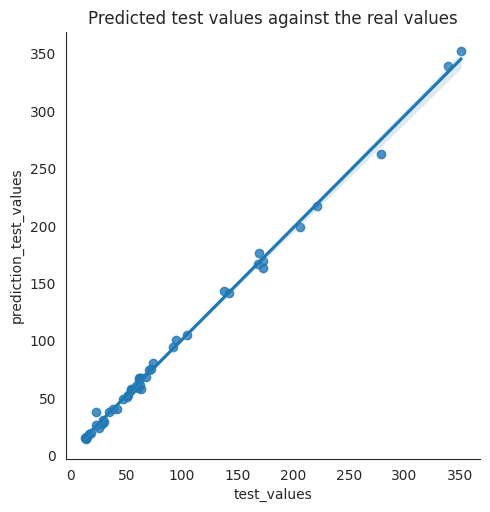

In [ ]:
sns.set_style('white')
sns.lmplot(x='test_values',y='prediction_test_values',data= pd.DataFrame({'test_values':y_test,'prediction_test_values':Y_prediction_test}))
plt.title('Predicted test values against the real values')


#### 2. Cross- Validation & Hyperparameter Tuning of Model 1

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
gcv= GridSearchCV(LR,param_grid={'fit_intercept':[True , False]},scoring='r2', cv=5)
# Fit the Algorithm
gcv.fit(X_train,y_train)

print(gcv.best_params_)
print(gcv.best_score_)

{'fit_intercept': True}
0.9919544295105268


In [ ]:

Tuned_LR=LinearRegression(fit_intercept =True)
Tuned_LR.fit(X_train , y_train)

LinearRegression()

In [ ]:
tuned_predic_test=Tuned_LR.predict (X_test)
tuned_predic_test

array([ 67.59941298, 169.63275508, 142.86472393,  80.16941923,
        14.85034821,  74.77801325,  19.45469366, 100.05654207,
        15.38099891,  49.24876035, 166.98044076,  37.41949502,
        24.12250932, 262.34725678,  74.37449265,  30.91647027,
       104.94704319,  58.39539688,  27.39345988, 163.35535313,
        52.68648526,  14.12349755, 339.58290235,  16.10344922,
       175.91565552,  60.34242839,  26.11720536,  67.65551245,
       141.6182689 ,  65.82091343,  68.61202909,  61.30150826,
        93.98507104, 217.32318335, 351.91990033,  28.64181662,
        37.55168274,  18.58123427,  40.61762401,  57.47806308,
        15.8649497 ,  50.59888131,  56.61054713,  40.66037789,
        57.82163002,  67.44539097, 198.51594087])

In [ ]:
tuned_predic_train =Tuned_LR.predict (X_train)
tuned_predic_train

array([ 31.57564506,  52.79501282, 316.78986854,  53.54584583,
        83.71791726,  33.58236444, 114.14601925,  64.11597911,
       127.87898793,  74.75609848,  59.33753992,  12.42046118,
        54.82502198,  27.2831957 , 166.46376619, 313.96113146,
        51.00562976, 342.60077913,  91.13836051, 118.78114358,
        26.14894509,  16.92979537, 322.37182773, 288.64721452,
        51.84042031, 167.40529971, 322.73200952, 126.903403  ,
        15.70522891,  27.84715155, 298.57774284,  29.53477535,
        34.09552991,  54.44469597,  69.48568715,  29.34730315,
        62.64456126,  45.91233499,  19.74910068,  62.94921468,
        73.99326301,  59.84703591,  52.27535337,  15.43093672,
        34.65869459, 260.7776824 ,  45.32577802,  29.39381739,
        40.79707187, 345.28360856,  66.29127167,  16.21238881,
       196.63312908,  48.31488425, 249.87137335,  15.58804336,
        72.07919845, 373.70869581, 216.49260998, 181.66526742,
        29.9930172 ,  16.91180184,  16.06333479,  34.85

In [ ]:
#coefficients
Tuned_LR.coef_

array([-50.83846314,  59.9336686 ,  92.97189545])

In [ ]:
#Intercept
Tuned_LR.intercept_

111.64043478260866

**Visualizing evaluation Metric Score chart**

In [ ]:
tuned_mae_test=mean_absolute_error(y_test ,tuned_predic_test)
tuned_mae_test

3.4072505564263644

In [ ]:
tuned_mae_train=mean_absolute_error(y_train ,tuned_predic_train)
tuned_mae_train

4.552655128971373

In [ ]:
tuned_mse_test=mean_squared_error(y_test ,Y_prediction_test)
tuned_mse_test

23.268235150472655

In [ ]:
tuned_mse_train=mean_squared_error(y_train ,Y_prediction_train)
tuned_mse_train

56.364634178028176

In [ ]:
tuned_rmse_test=np.sqrt(tuned_mse_test)
tuned_rmse_test

4.8237159068992295

In [ ]:
tuned_rmse_train=np.sqrt(tuned_mse_train)
tuned_rmse_train

7.507638388869577

**Checking model accuracy**

In [ ]:
tuned_test_score=r2_score(y_test,tuned_predic_test)
tuned_test_score

0.9965380887242618

In [ ]:
tuned_train_score=r2_score(y_train,tuned_predic_train)
tuned_train_score

0.9946350283624178

In [ ]:
print("tuned_train_score  : " ,tuned_train_score)
print("tuned_test_score   : " ,tuned_test_score)

print("tuned_mae_train  : " ,tuned_mae_train)
print("tuned_mae_test   : " ,tuned_mae_test)

print("tuned_mse_train : " ,tuned_mse_train)
print("tuned_mse_test : " ,tuned_mse_test)

print("tuned_rmse_train  : " ,tuned_rmse_train)
print("tuned_rmse_test  : " ,tuned_rmse_test)

tuned_train_score  :  0.9946350283624178
tuned_test_score   :  0.9965380887242618
tuned_mae_train  :  4.552655128971373
tuned_mae_test   :  3.4072505564263644
tuned_mse_train :  56.364634178028176
tuned_mse_test :  23.268235150472655
tuned_rmse_train  :  7.507638388869577
tuned_rmse_test  :  4.8237159068992295


**Plotting the Tuned Predicted test values against the real values using Seaborn**

Text(0.5, 1.0, 'Tuned Predicted test values against the real values')

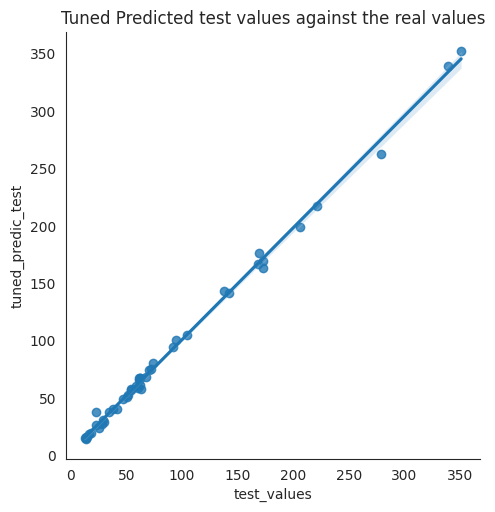

In [ ]:
sns.set_style('white')
sns.lmplot(x='test_values',y='tuned_predic_test',data= pd.DataFrame({'test_values':y_test,'tuned_predic_test':Y_prediction_test}))
plt.title('Tuned Predicted test values against the real values')

##### Which hyperparameter optimization technique have you used and why?

**We have used GridSearchCV optimization technique** ,
**we used it because it exhaustively searches over the specified parameter values for an estimator and finds the best combination of hyperparameters that gives the highest cross-validation score. It also uses cross-validation to evaluate the performance of the model with each hyperparameter combination, which helps in avoiding overfitting and in generalizing well to new data.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**There is no changes in the Evaluation metrics after cross validation and hyperparameter tuning .**

### ML Model - 2
Ridge Regression

In [ ]:
# Implementing Ridge regression
ridge=Ridge()

# Fit the Algorithm
ridge.fit(X_train,y_train)

# Predict the Algorithm

ridge_predict_train=ridge.predict(X_train)
ridge_predict_train

ridge_predict_test=ridge.predict(X_test)
ridge_predict_test

array([ 66.20997762, 165.92259384, 144.42776793,  79.30274749,
        15.22760508,  74.56601744,  19.99866973, 101.40126799,
        15.63144923,  49.77470796, 169.58563401,  32.02177008,
        22.1725485 , 253.63900837,  74.92937642,  31.30207924,
       102.693762  ,  59.66502601,  28.17902043, 156.89235885,
        53.06811058,  16.37326282, 342.70666841,  16.00770841,
       175.38609322,  59.36932685,  27.52856147,  67.3054206 ,
       141.40166192,  67.91697508,  68.47800205,  59.2621388 ,
        95.34440059, 215.36138052, 355.1245065 ,  28.32041767,
        38.40077361,  18.6556788 ,  40.44525363,  56.56949352,
        15.75762661,  49.89719676,  58.17006938,  40.18555539,
        58.17043316,  66.83382735, 196.52425563])

In [ ]:

ridge_train_r2_score=r2_score(ridge_predict_train,y_train)
ridge_test_r2_score=r2_score(ridge_predict_test,y_test)

ridge_mae_train=mean_absolute_error(ridge_predict_train,y_train)
ridge_mae_test=mean_absolute_error(ridge_predict_test,y_test)

ridge_mse_train=mean_squared_error(ridge_predict_train,y_train)
ridge_mse_test=mean_squared_error(ridge_predict_test,y_test)

ridge_rmse_train= np.sqrt(ridge_mse_train)
ridge_rmse_test=np.sqrt(ridge_mse_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Visualizing evaluation Metric Score chart**

In [ ]:
print("ridge_train_r2_score : " ,ridge_train_r2_score)
print("ridge_test_r2_score: " ,ridge_test_r2_score)

print("ridge_mae_train: " ,ridge_mae_train)
print("ridge_mae_test: " ,ridge_mae_test)

print("ridge_mse_train: " ,ridge_mse_train)
print("ridge_mse_test: " ,ridge_mse_test)

print("ridge_rmse_train: " ,ridge_rmse_train)
print("ridge_rmse_test: " ,ridge_rmse_test)

ridge_train_r2_score :  0.9927973178449095
ridge_test_r2_score:  0.9943051163721711
ridge_mae_train:  5.295218685642063
ridge_mae_test:  4.230297776291411
ridge_mse_train:  74.30011947991672
ridge_mse_test:  36.24327996645321
ridge_rmse_train:  8.619751706395999
ridge_rmse_test:  6.02023919511951


**Plotting the  Predicted test values against the real values using Seaborn**

Text(0.5, 1.0, 'Predicted test values against the real values')

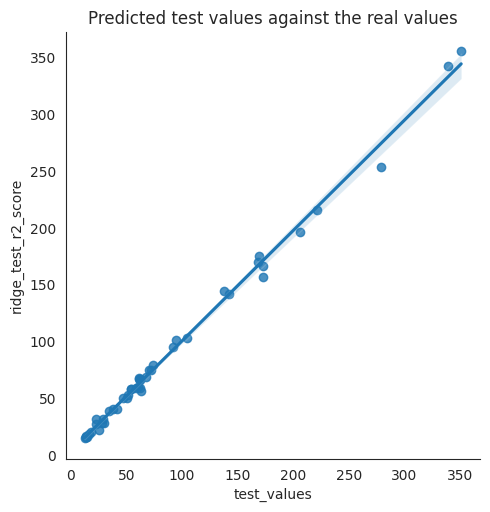

In [ ]:
sns.set_style('white')
sns.lmplot(x='test_values',y='ridge_test_r2_score',data= pd.DataFrame({'test_values':y_test,'ridge_test_r2_score':ridge_predict_test}))
plt.title('Predicted test values against the real values')

**#### 2. Cross- Validation & Hyperparameter Tuning of Model 2**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
gcv= GridSearchCV(Ridge(),param_grid={'alpha':[20,10,30,15,25,35,40,50,100]},scoring='r2', cv=5)
gcv.fit(X_train,y_train)
print(gcv.best_params_)
print(gcv.best_score_)

{'alpha': 10}
0.979462439672905


In [ ]:
# Fit the Algorithm

tuned_ridge= Ridge(alpha=10)

tuned_ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [ ]:
# Predict on the model
tuned_ridge_y_train_pred =tuned_ridge.predict(X_train)
print(tuned_ridge_y_train_pred)

tuned_ridge_y_test_pred =tuned_ridge.predict(X_test)
print(tuned_ridge_y_test_pred)

#coefficient
ridge.coef_

#Intercept
ridge.intercept_


[ 31.54918732  51.90251071 305.56288214  59.26040248  80.81496532
  34.84982974 110.58473896  58.51994392 119.84703182  72.86556748
  55.40481469  14.95889382  57.12417634  27.23216083 165.50536713
 307.98600262  48.59582566 312.71881951  87.86577448 116.26794587
  28.63424878  17.20075747 330.37059979 299.91619105  56.90349677
 168.66709799 330.64928095 143.9961995   16.75578348  39.72919793
 302.5078315   31.74801758  37.64385982  54.21121823  65.20185692
  29.67426598  63.21155411  45.42946676  21.36143644  67.44931076
  72.05114843  74.58831421  51.02320219  16.9597605   36.27093511
 252.33682931  58.33676581  29.51051337  45.38246561 323.51188566
  69.45821183  15.95313075 194.0322362   58.01598528 256.03924784
  18.01652301  70.07740194 354.82457318 197.68474421 174.7122787
  31.1057752   19.00281416  19.57981632  34.90649798  98.39304116
  72.34399781  18.4007496  162.50883322  31.36788588 342.0985164
 238.62857824  69.77766548  36.31157858 199.93612664 108.17832079
  38.4327175

111.64043478260866

**Visualizing evaluation Metric Score chart**

In [ ]:
tuned_ridge_mae_test=mean_absolute_error(y_test ,tuned_ridge_y_test_pred)
tuned_ridge_mae_test

5.850610291722767

In [ ]:
tuned_ridge_mae_train=mean_absolute_error(y_train ,tuned_ridge_y_train_pred)
tuned_ridge_mae_train

7.564895928151995

In [ ]:
tuned_ridge_mse_test =mean_squared_error(y_test ,tuned_ridge_y_test_pred)
tuned_ridge_mse_test

73.5852732123718

In [ ]:
tuned_ridge_mse_train =mean_squared_error(y_train ,tuned_ridge_y_train_pred)
tuned_ridge_mse_train

168.50272422455694

In [ ]:
tuned_ridge_rmse_test=np.sqrt(tuned_ridge_mse_test)
tuned_ridge_rmse_test

8.578185892854725

In [ ]:
tuned_ridge_rmse_train=np.sqrt(tuned_ridge_mse_train)
tuned_ridge_rmse_train

12.980859918532245

**Checking model accuracy**

In [ ]:
tuned_ridge_train__r2_score=r2_score(ridge_predict_train,y_train)
tuned_ridge_train__r2_score

0.9927973178449095

In [ ]:
tuned_ridge_test__r2_score=r2_score(ridge_predict_test,y_test)
tuned_ridge_test__r2_score

0.9943051163721711

**Visualizing evaluation Metric Score chart**

In [ ]:
print("tuned_ridge_train__r2_score : " ,tuned_ridge_train__r2_score)
print("tuned_ridge_test__r2_score: " ,tuned_ridge_test__r2_score)

print("tuned_ridge_mae_train: " ,tuned_ridge_mae_train)
print("tuned_ridge_mae_test: " ,tuned_ridge_mae_test)

print("tuned_ridge_mse_train: " ,tuned_ridge_mse_train)
print("tuned_ridge_mse_test: " ,tuned_ridge_mse_test)

print("tuned_ridge_rmse_train: " ,tuned_ridge_rmse_train)
print("tuned_ridge_rmse_test: " ,ridge_rmse_test)

tuned_ridge_train__r2_score :  0.9927973178449095
tuned_ridge_test__r2_score:  0.9943051163721711
tuned_ridge_mae_train:  7.564895928151995
tuned_ridge_mae_test:  5.850610291722767
tuned_ridge_mse_train:  168.50272422455694
tuned_ridge_mse_test:  73.5852732123718
tuned_ridge_rmse_train:  12.980859918532245
tuned_ridge_rmse_test:  6.02023919511951


**Plotting the  Predicted test values against the real values using Seaborn**

Text(0.5, 1.0, 'Predicted test values against the real values')

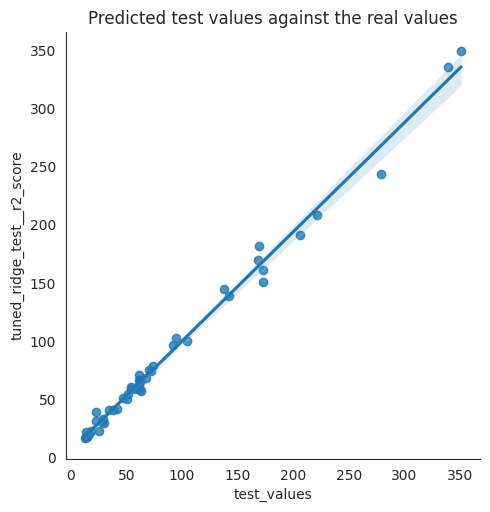

In [ ]:
sns.set_style('white')
sns.lmplot(x='test_values',y='tuned_ridge_test__r2_score',data= pd.DataFrame({'test_values':y_test,'tuned_ridge_test__r2_score':tuned_ridge_y_test_pred}))
plt.title('Predicted test values against the real values')

##### Which hyperparameter optimization technique have you used and why?

**We have used GridSearchCV optimization technique** ,
**we used it because it exhaustively searches over the specified parameter values for an alpha that gives the highest cross-validation score. It also uses cross-validation to evaluate the performance of the model with each hyperparameter , which helps in avoiding overfitting and in generalizing well to new data.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**There is no changes in the Evaluation metrics after cross validation and hyperparameter tuning .**

# **Conclusion**

The MSE and R2 score are commonly used evaluation metrics for regression models. In this case, the Linear Regression and Ridge Regression models have very similar performance, with the Ridge Regression model having a slightly lower MSE and a slightly higher R2 score.

The mean squared error (MSE) measures the average squared difference between the predicted and actual values, where a lower MSE indicates better performance. The R-squared (R2) score measures the proportion of the variance in the dependent variable that is predictable from the independent variables, where a higher R2 score indicates better performance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***